In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
csv_path = "CCPP_data.csv"
df = pd.read_csv(csv_path)

Some basic analysis on the data

In [ ]:
# shape of data and the corresponding columns

df.shape, df.columns
# df.head()

In [ ]:
# Clean column names
df.columns = df.columns.str.strip()
df.columns.tolist()

In [ ]:
# check data types
df.info()

In [ ]:
# missing values
df.isnull().sum()

In [31]:
# if ranges make sense
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


array([[<Axes: title={'center': 'AT'}>, <Axes: title={'center': 'V'}>],
       [<Axes: title={'center': 'AP'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'PE'}>, <Axes: >]], dtype=object)

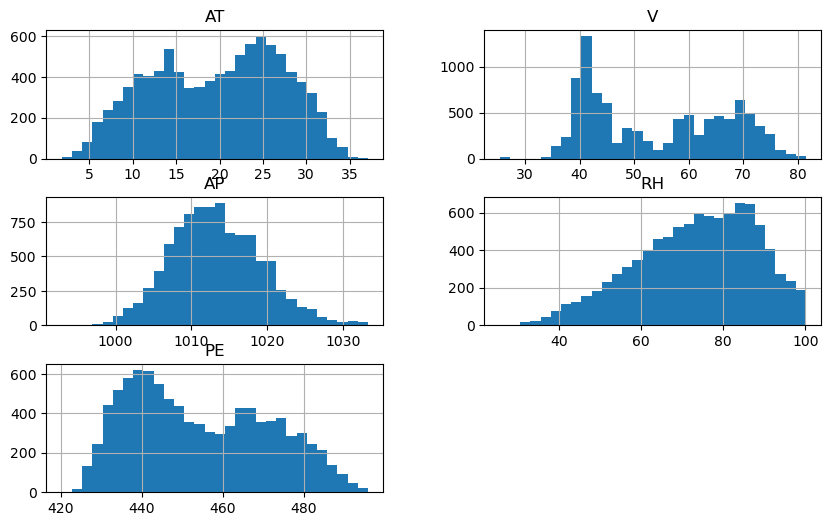

In [32]:
# distribution + outlier glance
df.hist(figsize=(10,6), bins=30)

In [ ]:
# Correlation (helps interpretation later)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("images/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

Define Features and Targets

In [ ]:
X = df[["AT", "V", "AP", "RH"]]
y = df["PE"]

Train/Test Split

In [ ]:
# hold out 20% as a true test set and keep it untouched until final evaluation.

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test: ", X_test.shape,  "y_test: ", y_test.shape)

In [ ]:
# Confirm the split looks reasonable

print("Train target mean:", y_train.mean())
print("Test target mean: ", y_test.mean())

Model 1 - Baseline Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Train the model

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

In [ ]:
# Make Predictions

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

In [ ]:
# Evaulate using MAE

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

In [ ]:
# R^2

print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))

In [ ]:
# Which feature affects PE most
# Whether the effect is positive/negative
# How to interpret the magnitude

coef_table = pd.DataFrame({
    "feature": X_train.columns,
    "coefficient": lin_reg.coef_
}).sort_values(by="coefficient", key=abs, ascending=False)

coef_table

In [ ]:
print("Intercept:", lin_reg.intercept_)

In [ ]:
# Cross-Validation on Linear Regression

# Split training data into 5 folds
# Train 5 times
# Evaluate MAE on each fold
# Average the results

# Run 5-Fold Cross Validation (on training set only)
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    lin_reg,
    X_train,
    y_train,
    scoring="neg_mean_absolute_error",
    cv=5
)

cv_mae = -cv_scores  # sklearn returns negative MAE

print("Cross-Validation MAE scores:", cv_mae)
print("Average CV MAE:", cv_mae.mean())
print("Std Dev of CV MAE:", cv_mae.std())


In [ ]:
# Experiment with fewer features first

# Model 2: Only AT
X_train_AT = X_train[["AT"]]

cv_scores_AT = cross_val_score(
    LinearRegression(),
    X_train_AT,
    y_train,
    scoring="neg_mean_absolute_error",
    cv=5
)

print("AT only CV MAE:", -cv_scores_AT.mean())


In [ ]:
# Model 3: AT + V

X_train_AT_V = X_train[["AT", "V"]]

cv_scores_AT_V = cross_val_score(
    LinearRegression(),
    X_train_AT_V,
    y_train,
    scoring="neg_mean_absolute_error",
    cv=5
)

print("AT + V CV MAE:", -cv_scores_AT_V.mean())


In [ ]:
# Model 4: AT + AP

X_train_AT_AP = X_train[["AT", "AP"]]

cv_scores_AT_AP = cross_val_score(
    LinearRegression(),
    X_train_AT_AP,
    y_train,
    scoring="neg_mean_absolute_error",
    cv=5
)

print("AT + AP CV MAE:", -cv_scores_AT_AP.mean())

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# n_estimators=200 → number of trees
# n_jobs=-1 → use all CPU cores (faster)
# random_state=42 → reproducibility


rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

In [ ]:
# use the same 5-fold CV on the training data.

cv_scores_rf = cross_val_score(
    rf,
    X_train,
    y_train,
    scoring="neg_mean_absolute_error",
    cv=5
)

cv_mae_rf = -cv_scores_rf

print("Random Forest CV MAE scores:", cv_mae_rf)
print("Average RF CV MAE:", cv_mae_rf.mean())
print("Std Dev RF CV MAE:", cv_mae_rf.std())

In [ ]:
# Train on Full Training Set

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_test_mae = mean_absolute_error(y_test, y_pred_rf)
rf_test_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Test MAE:", rf_test_mae)
print("Random Forest Test R²:", rf_test_r2)


In [ ]:
# Model Interpretation for RF

import pandas as pd

rf_importances = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values(by="importance", ascending=False)

rf_importances
